<h2><center>Predicting Financial Inclusion with Repeated Cross-sectional Data</center></h2>

 <h3><center>Scientific Python - Final Project, 2022/23 Fall<br><br>Mehmet Ataberk Atan<br><br>Central European University</center></h3>

## Introduction

The participation of individuals and businesses in formal financial systems is crucial for the development of any country. The extent to which these systems are inclusive and able to serve all members of society significantly affects their effectiveness. While financial inclusion is increasing globally, this increase is not experienced equally by all groups. Some segments of society may have limited access to formal financial institutions, particularly in middle-income countries. 

Turkey, a middle-income country, has a long-standing and well-regulated financial system that offers lifelong free access to bank accounts and debit cards for all individuals. Despite this, it is worth examining whether certain socioeconomic groups in Turkey have lower access to financial services and accounts. By understanding any disparities in access, policymakers and financial institutions can work to increase financial inclusion for all members of society.

Predicting who is less likely to be included in the financial system can help governments and financial institutions to design better targeted policies.

#### Question:

Which machine learning model predicts which measure of financial inclusion the best?

In [1]:
#Importing the main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#I want to ignore the warning messages.
import warnings
warnings.filterwarnings('ignore')

## Data
This study uses data from the [Global Financial Inclusion Index](https://www.worldbank.org/en/publication/globalfindex) project, which contains financial inclusion metrics for over 100 countries at the individual level. It is published every three years for selected countries. The data used in this study is from Turkey, specifically from 2014 and 2017, with roughly 1000 observations per year. I pooled the datasets from 2014 and 2017 previously and did preliminary cleaning for an earlier Econometrics project in Stata. The two datasets are merged to capture any possible trend effect on the outcome variables. The data only includes individuals who are at least 15 years old, and the sample is balanced in terms of gender, with approximately 50% females and 50% males. All of the outcome variables are binary.

In [3]:
#Loading data
data = pd.read_stata("turfindex2014_2017_pooled.dta")

## Variable List

[Variable definitons for 2017 dataset](https://microdata.worldbank.org/index.php/catalog/3232/data-dictionary/F3?file_name=micro_tur)


[Variable definitons for 2014 dataset](https://microdata.worldbank.org/index.php/catalog/2501/data-dictionary/F1?file_name=micro_tur)

I previously cleaned and prepared relevant variables while pooling the data from two periods.

In [4]:
list(data)

['economy',
 'economycode',
 'wpid_random',
 'wgt',
 'age',
 'educ',
 'inc_q',
 'account',
 'account_fin',
 'account_mob',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q8a',
 'q8b',
 'q8c',
 'q8d',
 'q8e',
 'q8f',
 'q8g',
 'q8h',
 'q8i',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q16',
 'q17a',
 'q17b',
 'q17c',
 'q18a',
 'q18b',
 'q20',
 'q21a',
 'q21b',
 'q21c',
 'q21d',
 'q22a',
 'q22b',
 'q22c',
 'q24',
 'q25',
 'q26',
 'q27a',
 'q27b',
 'q27c',
 'q27d',
 'q28',
 'q29a',
 'q29b',
 'q29c',
 'q29d',
 'q30',
 'q31a',
 'q31b',
 'q31c',
 'q32',
 'q33a',
 'q33b',
 'q33c',
 'q34',
 'q35',
 'q36a',
 'q36bc',
 'q36d',
 'q37',
 'q38',
 'q39',
 'q40a',
 'q40bc',
 'q40d',
 'q41',
 'q42',
 'q43',
 'q44a',
 'q44b',
 'q44c',
 'saved',
 'borrowed',
 'year',
 'emp_in',
 'fin2',
 'fin3',
 'fin4',
 'fin5',
 'fin6',
 'fin7',
 'fin8',
 'fin9',
 'fin10',
 'fin11a',
 'fin11b',
 'fin11c',
 'fin11d',
 'fin11e',
 'fin11f',
 'fin11g',
 'fin11h',
 'fin14a',
 'fin14b',
 'fin14c',
 'fin15',
 'fin16',
 'fin17a',
 

In [5]:
#I keep only the potentially needed variables for the following analysis.
df = data[['economy',
 'economycode',
 'wpid_random',
 'wgt',
 'age',
 'educ',
 'inc_q',
 'account',
 'account_fin',
 'account_mob',
 'saved',
 'borrowed',
 'year',
 'emp_in',
 'mobileowner',
 'after',
 'formalborrow',
 'formalsave',
 'debitcard',
 'creditcard',
 'wagereceived',
 'remitreceived',
 'employed',
 'female',]]

 ### Different measures of financial inclusion:

**Formal Borrowing:** Whether the responder borrows through a financial institution.<br>
**Formal Saving:** Whether the responder saves through a financial institution.<br>
**Borrowing:** Whether the responder borrows besides FIs.<br>
**Saving:** Whether the responder saves besides FIs.<br>
**Debit Card:** Whether the responder has a debit card.<br>
**Credit Card:** Whether the responder has a credit card.

In [6]:
df.describe()

,wpid_random,wgt,year,formalborrow,formalsave
count,2.002000e+03,2002.000000,2002.000000,1991.000000,1988.000000
mean,1.610748e+08,1.000000,2015.498535,0.193370,0.194165
std,2.869681e+07,0.679200,1.500373,0.395042,0.395656
min,1.111782e+08,0.259040,2014.000000,0.000000,0.000000
25%,1.357944e+08,0.489998,2014.000000,0.000000,0.000000
50%,1.611497e+08,0.785857,2014.000000,0.000000,0.000000
75%,1.862872e+08,1.316444,2017.000000,0.000000,0.000000
max,2.110948e+08,3.227709,2017.000000,1.000000,1.000000


### Definitions of relevant variables:

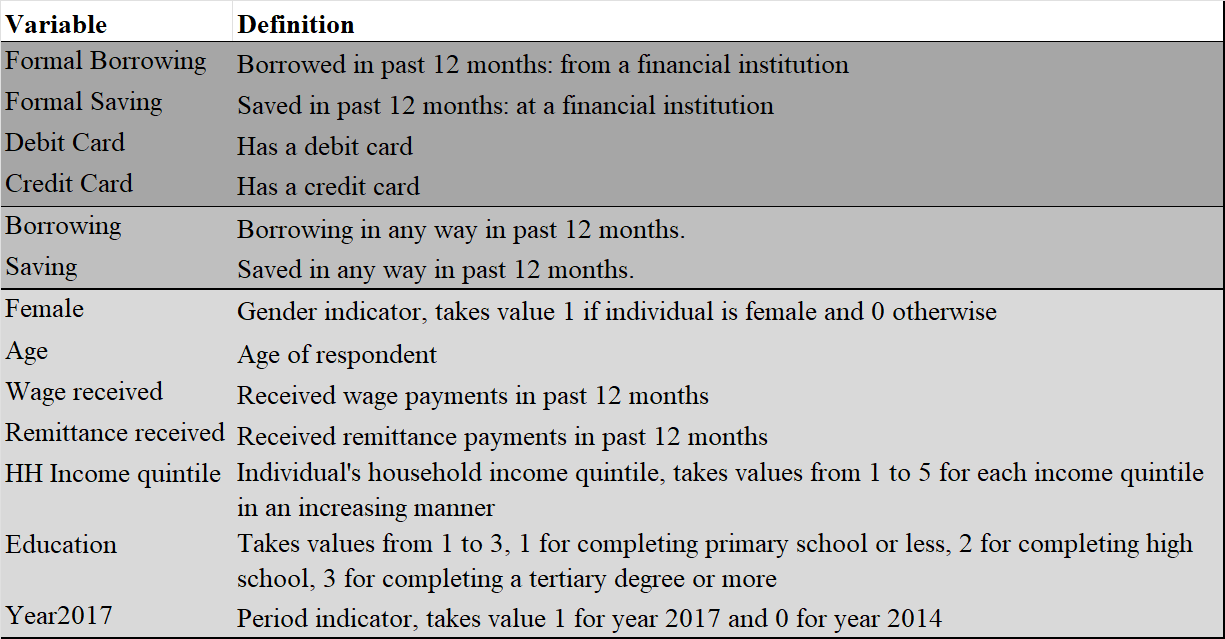

In [7]:
#Defining measures of financial inclusion as dependent variables
dependent_vars = ['debitcard','creditcard','formalborrow','formalsave','borrowed','saved']

In [8]:
#Changing values of the categorical variable to numerics
for var in dependent_vars:
    df[var].replace(['no', 'yes'],
                        [0.0, 1.0], inplace=True)

In [9]:
df.head()

,economy,economycode,wpid_random,wgt,age,educ,inc_q,account,account_fin,account_mob,...,mobileowner,after,formalborrow,formalsave,debitcard,creditcard,wagereceived,remitreceived,employed,female
0,Turkey,TUR,188635522,0.524185,35,secondary,4 fourth 20%,yes,yes,no,...,NaN,2014,0.0,0.0,0.0,1.0,no,no,no,female
1,Turkey,TUR,193524118,1.642873,36,completed primary or less,1 poorest 20%,no,no,no,...,NaN,2014,0.0,0.0,0.0,0.0,no,no,no,female
2,Turkey,TUR,183607721,0.383634,46,secondary,5 richest 20%,yes,yes,no,...,NaN,2014,0.0,0.0,1.0,0.0,yes,no,yes,female
3,Turkey,TUR,167196420,1.021568,47,secondary,1 poorest 20%,yes,yes,no,...,NaN,2014,0.0,0.0,0.0,0.0,no,no,no,female
4,Turkey,TUR,122201245,0.654847,17,secondary,5 richest 20%,no,no,no,...,NaN,2014,0.0,0.0,0.0,0.0,no,no,no,male


### Correlation Matrix of dependent variables

In [10]:
df[dependent_vars].corr()

,debitcard,creditcard,formalborrow,formalsave,borrowed,saved
debitcard,1.000000,0.519646,0.196484,0.291671,0.276288,0.113368
creditcard,0.519646,1.000000,0.328101,0.300641,0.445366,0.139939
formalborrow,0.196484,0.328101,1.000000,0.155211,0.411420,0.108097
formalsave,0.291671,0.300641,0.155211,1.000000,0.188665,0.559299
borrowed,0.276288,0.445366,0.411420,0.188665,1.000000,0.165732
saved,0.113368,0.139939,0.108097,0.559299,0.165732,1.000000


<AxesSubplot:>

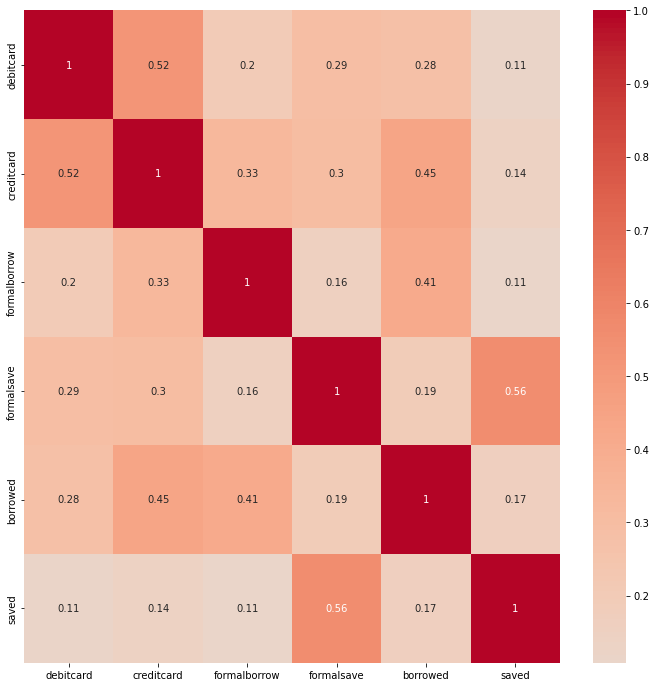

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df[dependent_vars].corr(), annot=True, center=0 , cmap="coolwarm")

**As a plausibility check, we can see that;**
- Having a debit card and credit card have a high correlation - it makes sense because when a customer applies for a debit card banks usually offer a credit card with advantegous rates.
- Formal borrowing and borrowing, and formal saving and saving also have a high correlation - people who saves or borrows tends to save and borrow through financial institutions too.
- Having a credit card is correlated with formal and regular borrowing - selp explanatory.


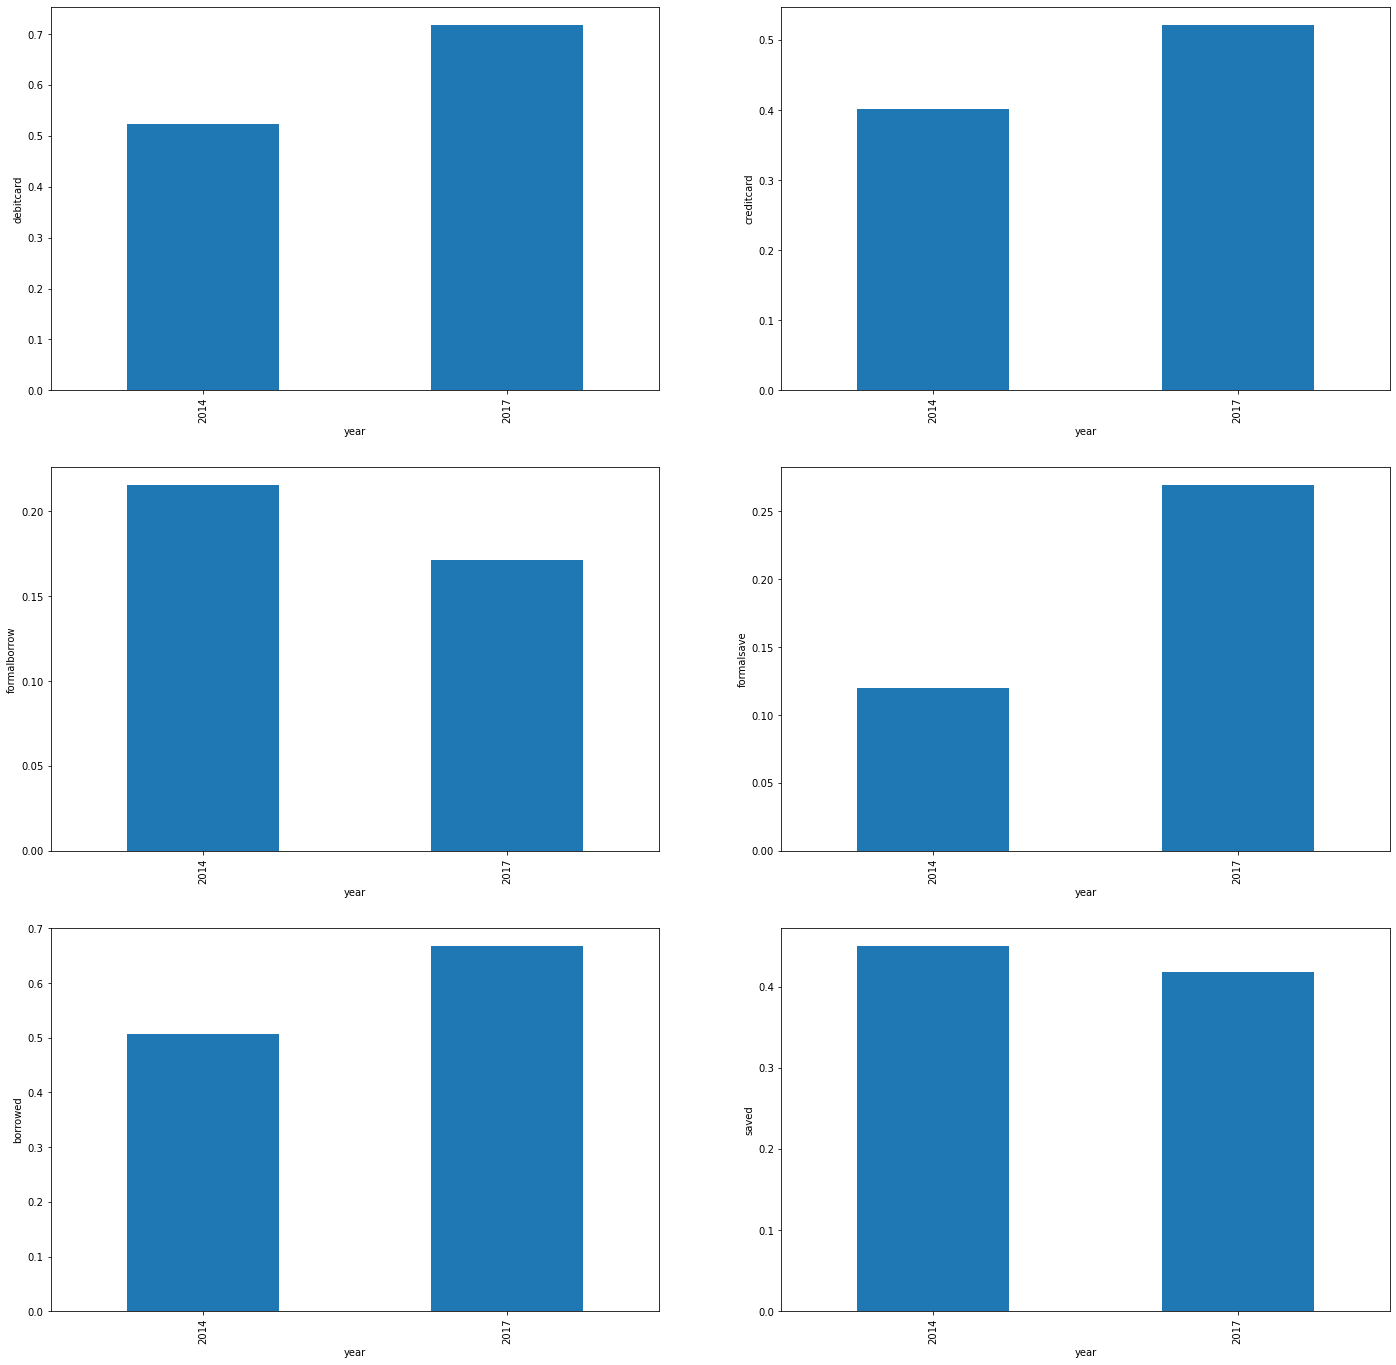

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(24,24))

for i, var in enumerate(dependent_vars):
    ax = axs[i//2][i%2]
    
    df.groupby('after')[var].mean().plot(kind='bar', ax=ax)
    
    ax.set_ylabel(var)
    ax.set_xlabel('year')

plt.show()

**We see above that;**
- All measures of financial inclusion, except *formal borrowing* and *saving*, increased from 2014 to 2017.
- Formal saving: Economic turbulence between the two time frames has been experienced in Turkey. Economic growth started slowing in 2013, GDP per capita also started decreasing and a coup attemp happened in 2016. People may have responded by spending less and saving more due to the uncertain future prospoects brought by the political and economic turbulence. Up to 2013, Turkey has been relatively stable.
- Formal borrowing: It might have decreased due to the same reason - lower spending appettite, more concretely lower income and higher turbulence.
- Savings: Decrease or stagnation in overall savings might be a reflection of increasing inflation rates. Working against the other forces, such as the decrease in per capita incomes, an inflationary enviroment discourages households from some forms of saving. Holding cash or similar commodities cannot preserve the value of the money. More sophisticated products are needed such as investing in index funds or term deposits in local or foreign currencies, which can only be done through financial institutions. This might explain the increase in formal savings despite the stagnance of overall savings.


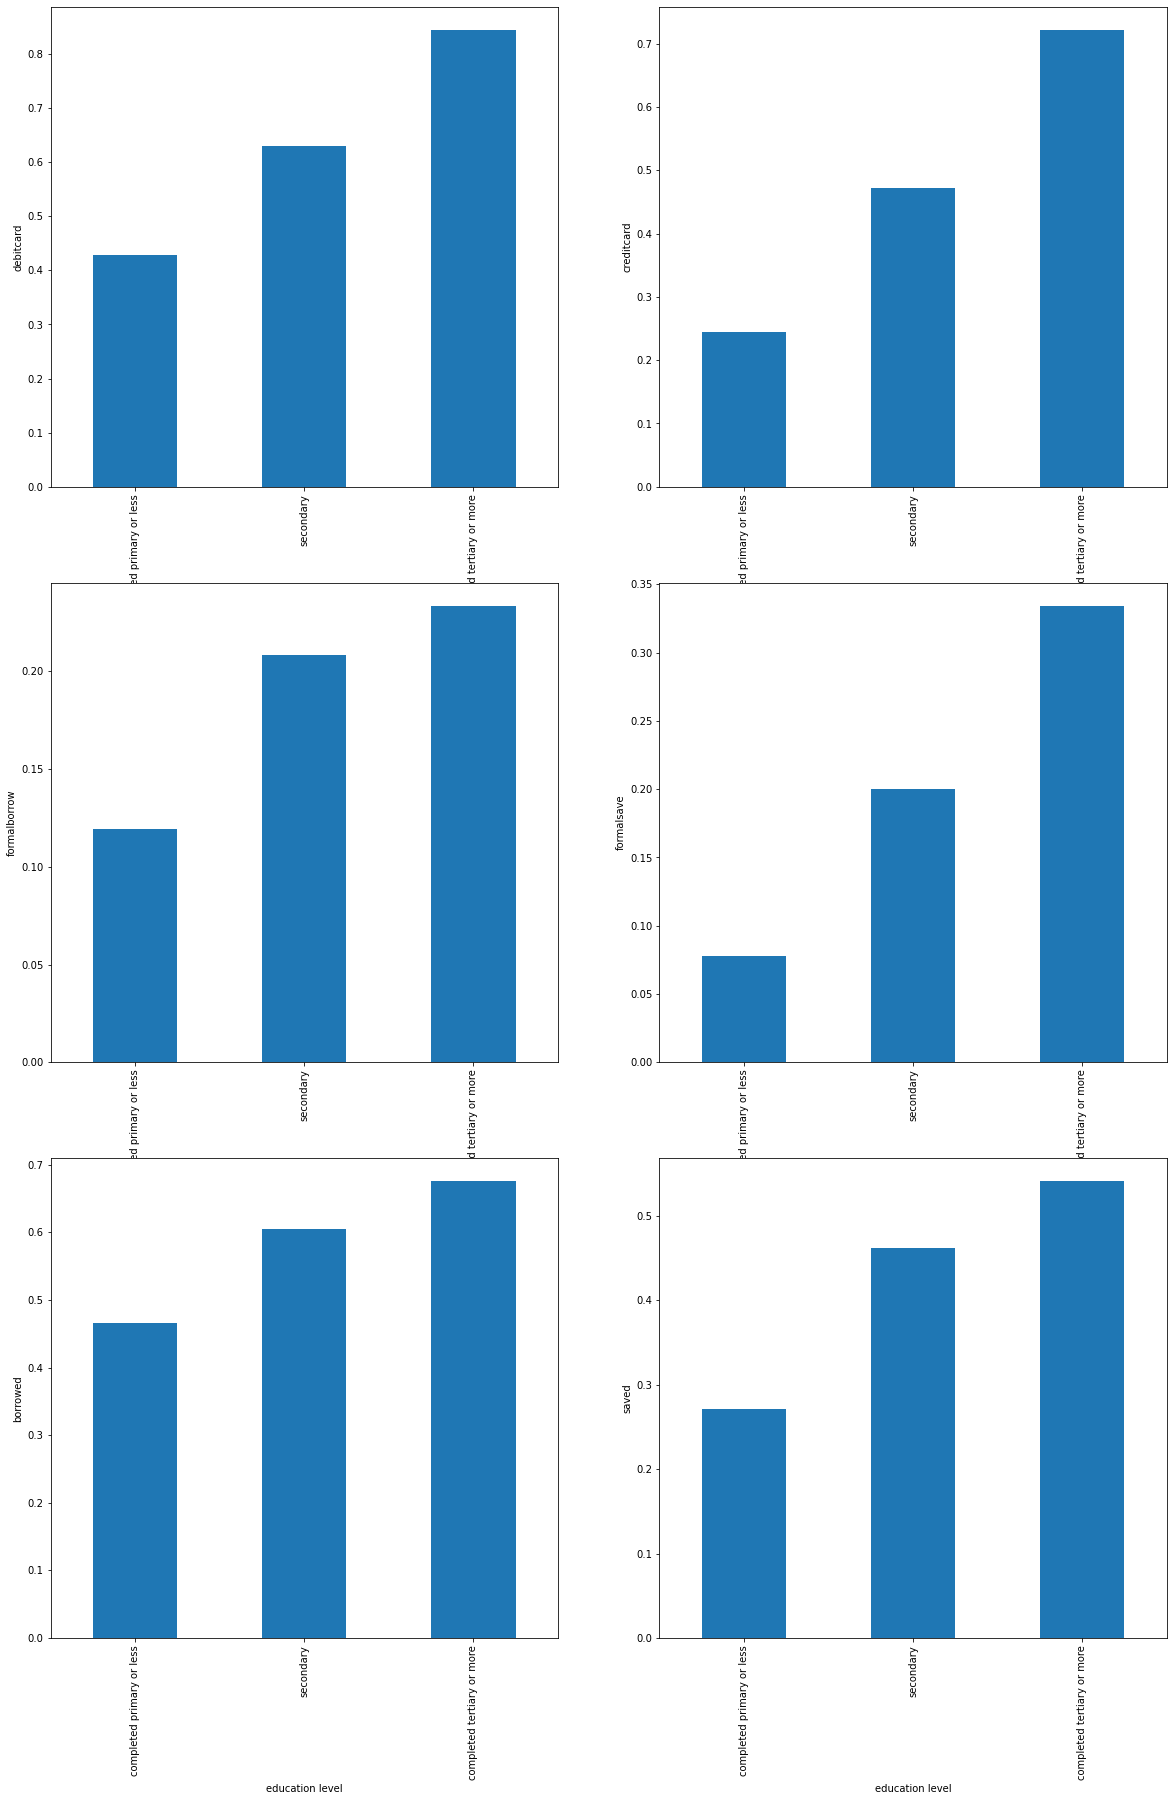

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(20,30))

for i, var in enumerate(dependent_vars):
    ax = axs[i//2][i%2]
    
    df.groupby('educ')[var].mean().plot(kind='bar', ax=ax)
    
    ax.set_ylabel(var)
    ax.set_xlabel('education level')

plt.show()

**Not much surprise here;**
- All measures of financial inclusion increase with level of education.
- Sharpest increase is observed in *formal saving*. This might be due to the fact that less educated people tend to resort to more traditional saving methods such as buying physical gold and foreign currencies rather than more sophisticated financial products.

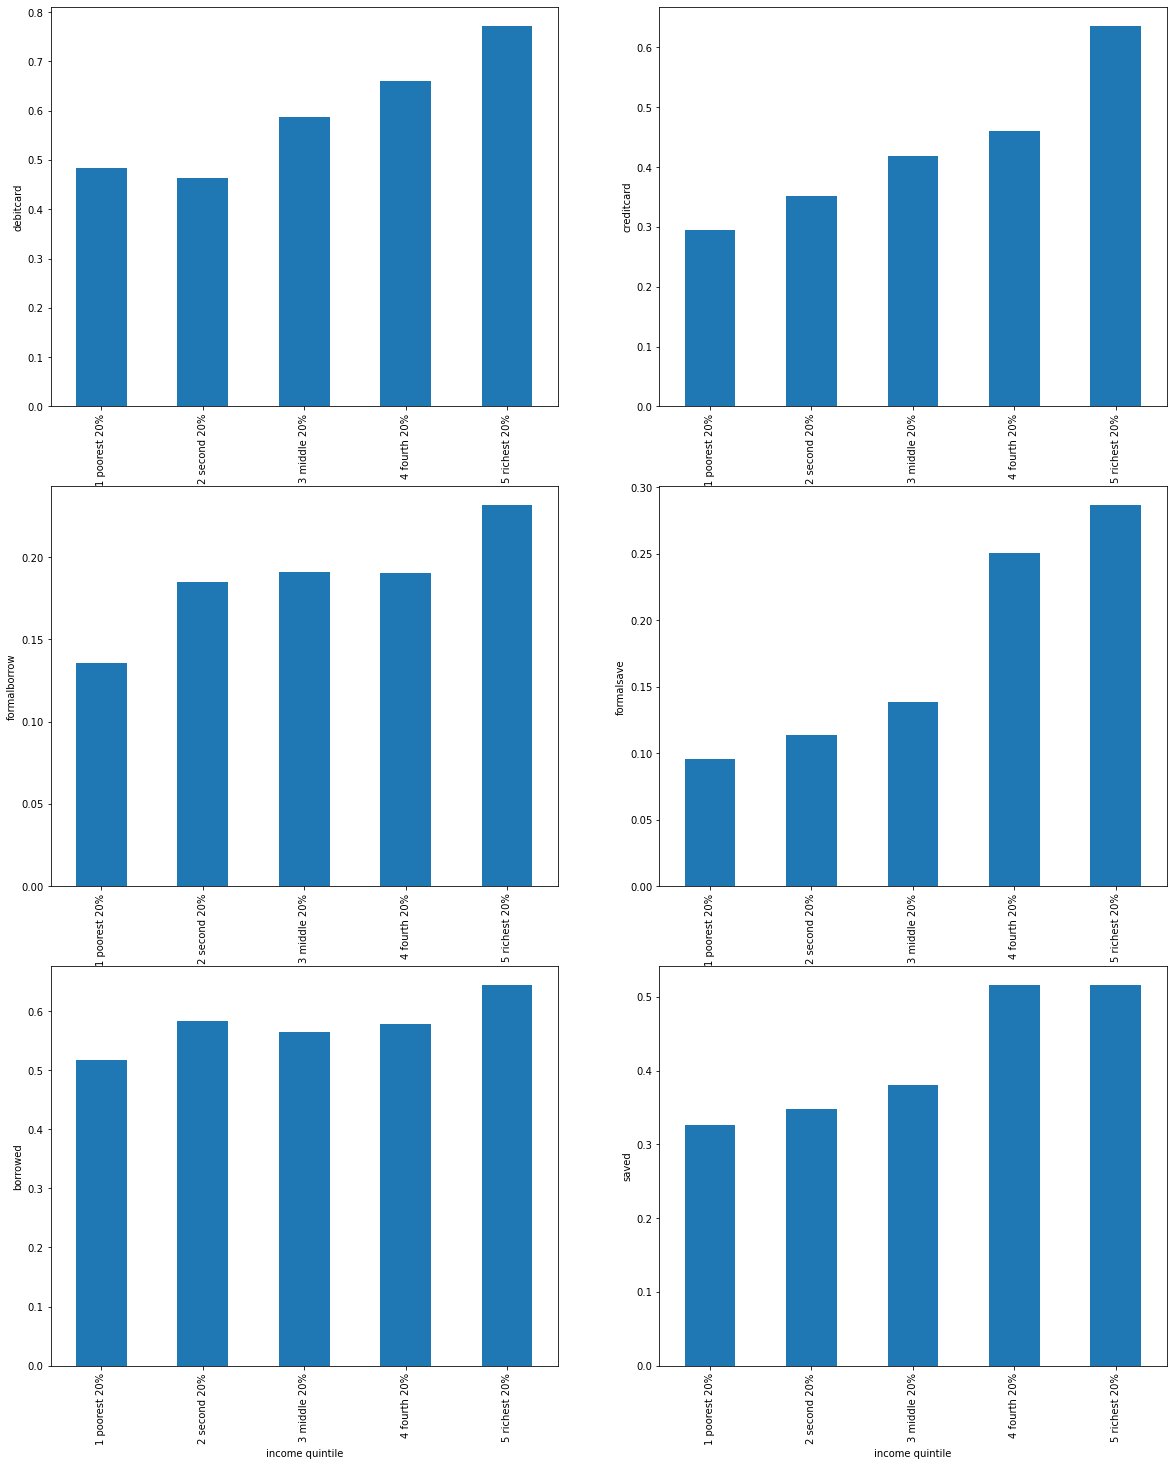

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(20,25))

for i, var in enumerate(dependent_vars):
    ax = axs[i//2][i%2]
    
    df.groupby('inc_q')[var].mean().plot(kind='bar', ax=ax)
    
    ax.set_ylabel(var)
    ax.set_xlabel('income quintile')

plt.show()

**A few observations;**
- All measures of financial inclusion increase with level of education.
- Sharpest increase is observed in *formal saving*. This might be due to the fact that less educated people tend to resort to more traditional saving methods such as buying physical gold and foreign currencies rather than more sophisticated financial products.

#### Further plotting to show disparities among sexes and different income groups:

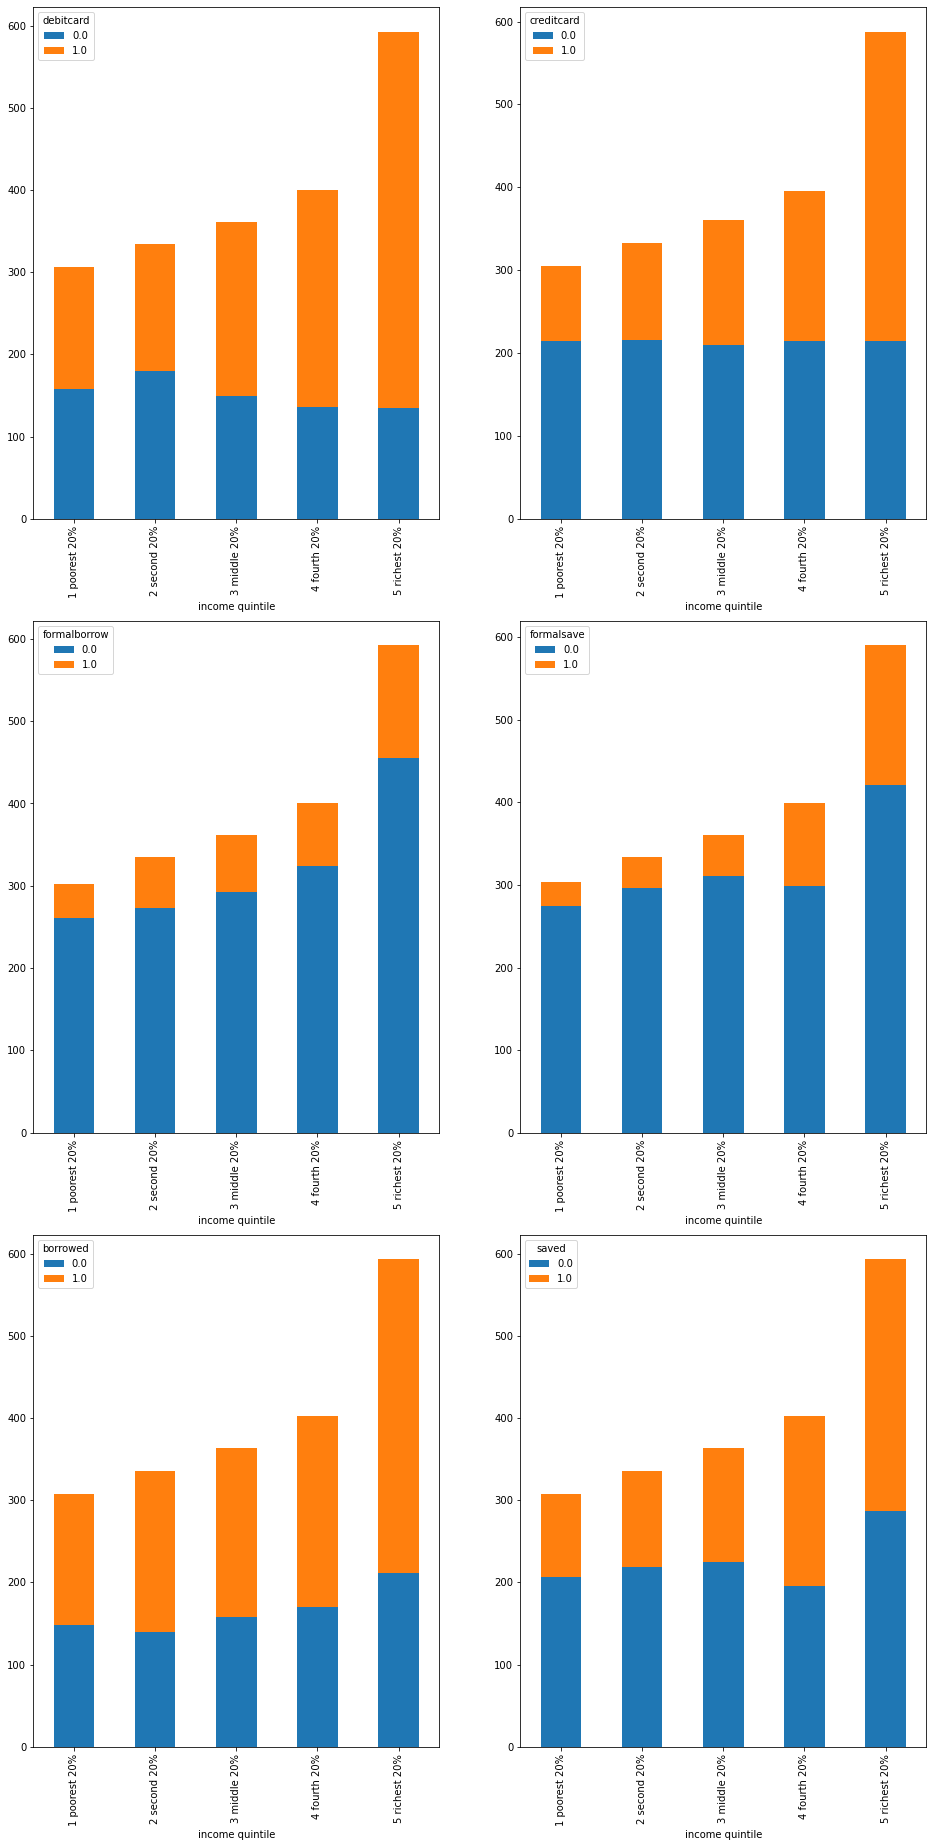

In [15]:
n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16,32))

# As usual I iterate over the dependent variables
for i, var in enumerate(dependent_vars):
    ax = axs[i//n_cols][i%n_cols]
    
    pd.crosstab(df['inc_q'], df[var]).plot.bar(stacked=True, ax=ax)
    
    ax.set_xlabel('income quintile')

plt.show()

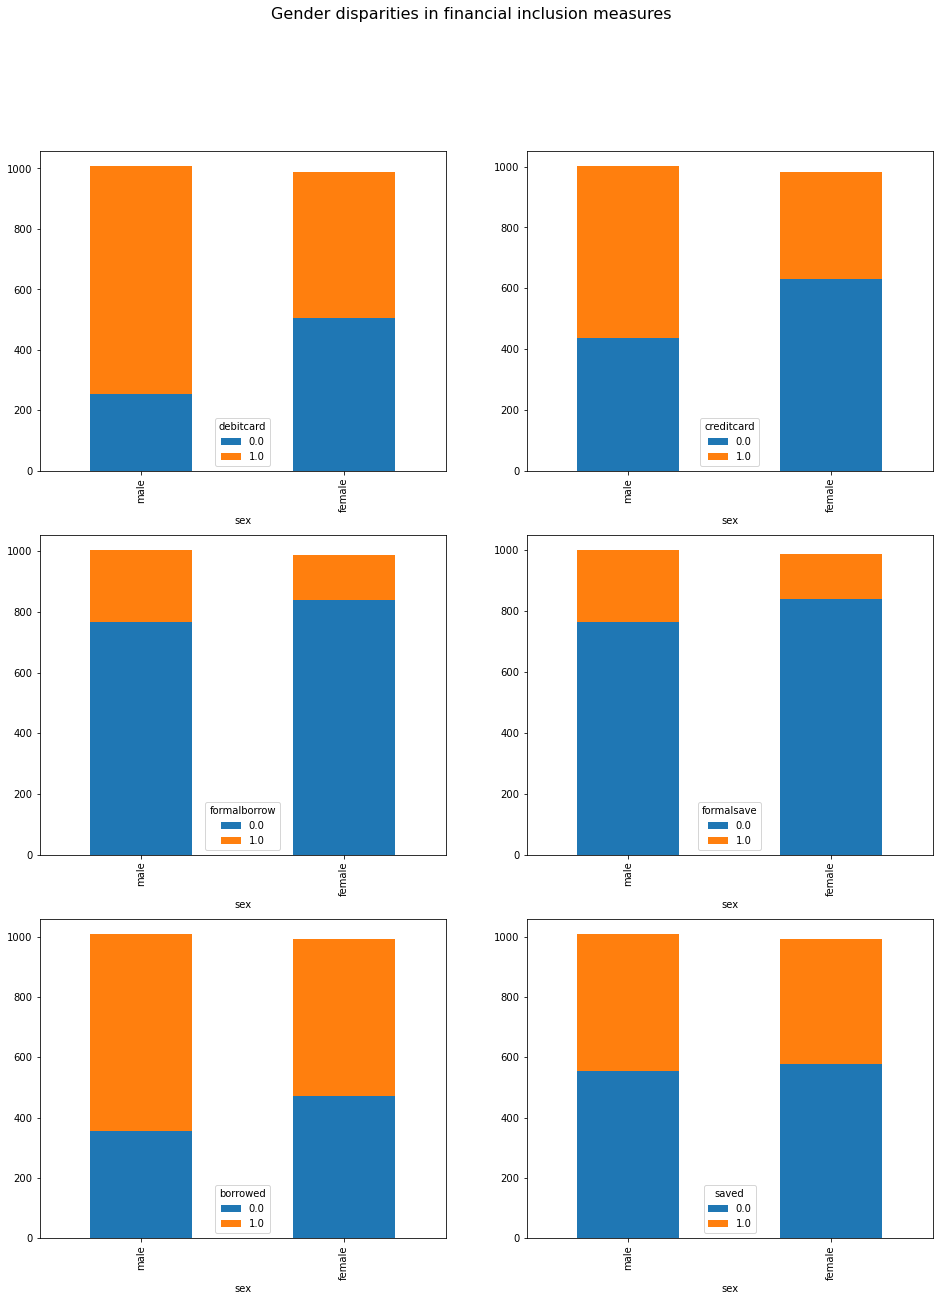

In [16]:
n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16,20))
fig.suptitle('Gender disparities in financial inclusion measures', fontsize=16)

for i, var in enumerate(dependent_vars):
    ax = axs[i//n_cols][i%n_cols]
    
    pd.crosstab(df['female'], df[var]).plot.bar(stacked=True, ax=ax)
    
    ax.set_xlabel('sex')

plt.show()

### Some formatting

In [17]:
#Changing the values of the independent categorical variables to numerics
df['inc_q'].replace(['1 poorest 20%', '2 second 20%' , '3 middle 20%' , 
                     '4 fourth 20%' , '5 richest 20%'] , 
                    [1, 2, 3, 4, 5], inplace=True)

df['educ'].replace(['completed primary or less' , 'secondary' , 'completed tertiary or more'],
                        [1, 2, 3], inplace=True)

df['female'].replace(['male' , 'female'],
                        [0, 1], inplace=True)

df['after'].replace(['2014' , '2017'],
                        [0, 1], inplace=True)

df['age'] = pd.to_numeric(df['age'])

#wagereceived etc.
for var in ['wagereceived','remitreceived','employed']:
    df[var].replace(['no', 'yes'], [0, 1], inplace=True)
    
independent_vars = df[['inc_q','educ','female','wagereceived','remitreceived','employed','after','age']]

### Correlation Matrix of independent variables

In [18]:
independent_vars.corr()

,inc_q,educ,female,wagereceived,remitreceived,employed,after,age
inc_q,1.000000,0.253105,-0.053267,0.142171,-0.036758,0.148092,0.047142,0.080388
educ,0.253105,1.000000,-0.101002,0.186127,0.039061,0.160867,-0.035721,-0.269617
female,-0.053267,-0.101002,1.000000,-0.242946,-0.091900,-0.272621,-0.010998,0.017582
wagereceived,0.142171,0.186127,-0.242946,1.000000,0.140824,0.885903,0.162191,-0.172288
remitreceived,-0.036758,0.039061,-0.091900,0.140824,1.000000,0.159820,-0.001229,-0.100876
employed,0.148092,0.160867,-0.272621,0.885903,0.159820,1.000000,0.222048,-0.159969
after,0.047142,-0.035721,-0.010998,0.162191,-0.001229,0.222048,1.000000,-0.050266
age,0.080388,-0.269617,0.017582,-0.172288,-0.100876,-0.159969,-0.050266,1.000000


<AxesSubplot:>

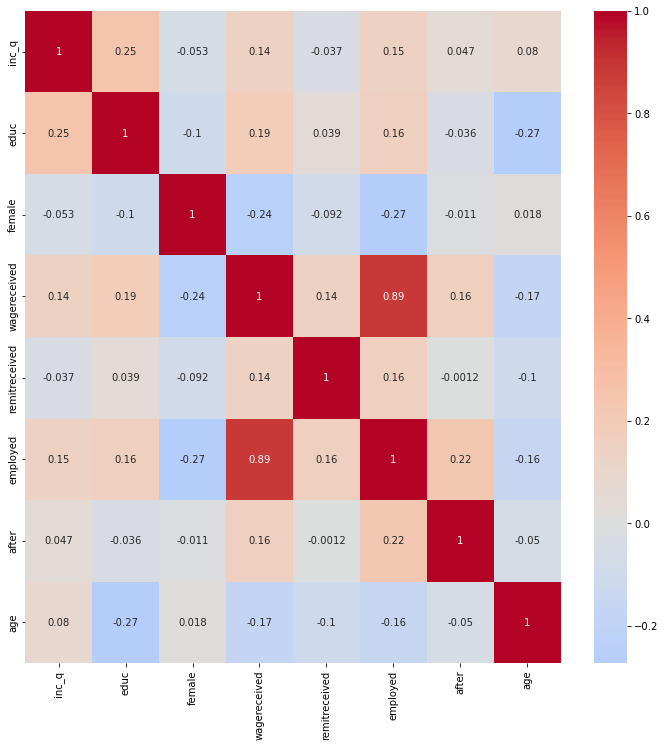

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(independent_vars.corr(), annot=True, center=0 , cmap="coolwarm")

Let us look at a few correlations in the above heatmap:
- Most critically, women in Turkey indeed: have less income, less education, are less likely to earn wage, are less likely to be employed, on average than men. Hence, they are behind men in every measure of financial inclusion as seen above in the graph 'Gender disparities in financial inclusion measures'. The smallest difference is in overall **saving**. According to Atan (2019), women in Turkey save as frequently as men with similar characteristics, but they tend to use non-formal financial institutions like rotating savings and credit associations rather than borrowing from formal institutions. This contrasts with borrowing behavior, which may differ between men and women.
- Being employed in the last 12 months and having received wage in the last 12 months are highly correlated. This is trivial but still reassuring to see. 
- Lastly, we see the after variable which indicates whether the data is from 2014 or 2017, is mostly correlated with **employed** and **wagereceived**. This is in line with the slow but steady increase in the employment rates in Turkey between 2014 and 2017. Below is a graph for Turkey Employment Rate:


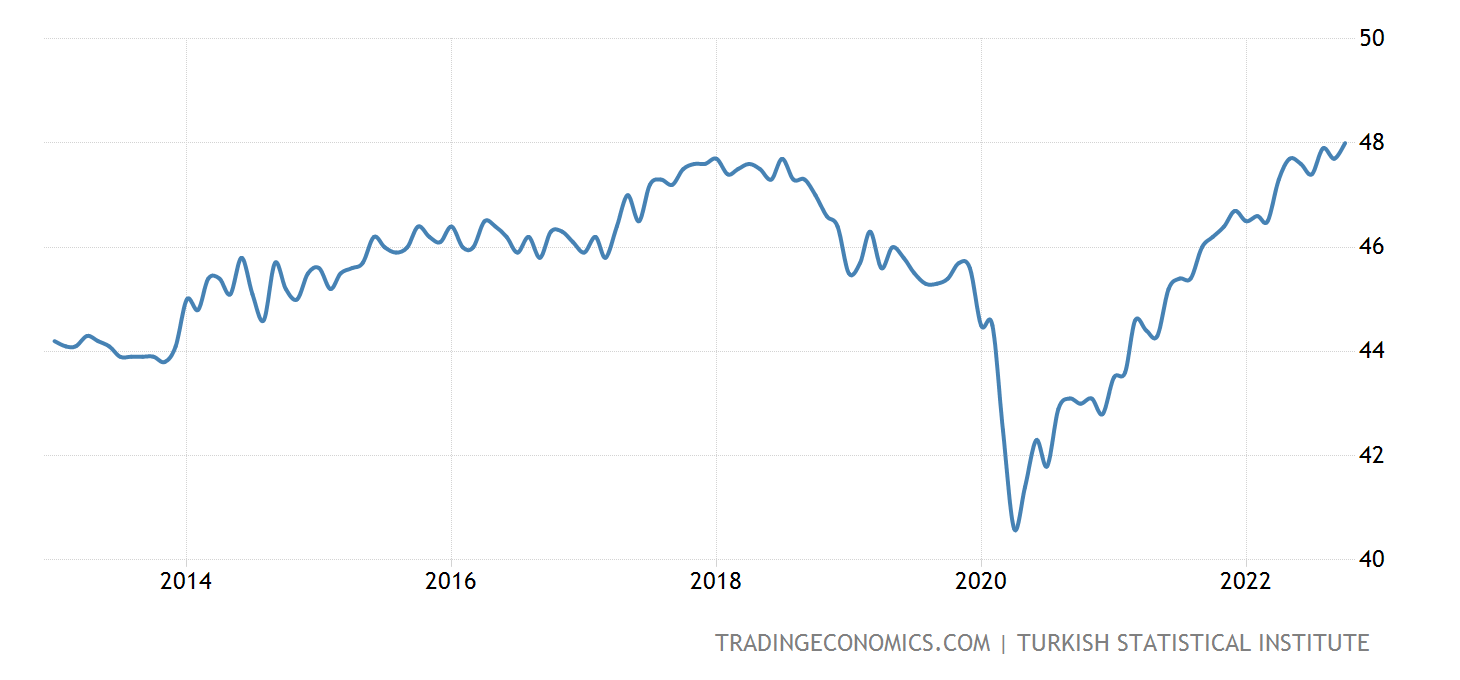

source: <a href='https://tradingeconomics.com/turkey/employment-rate'>tradingeconomics.com</a>

## Analysis - Prediction

Since all the data I have is labelled, I will be using the following classification (supervised learning) models;
- Support Vector Machines
- Decision Trees
- Logistic Regression (Logit)

### Prediction with Support Vector Machines

I create a function that contains the whole pipeline for the SVM model from splitting data into train and test sets to reporting accuracy. I repeat this process also for the following models.

In [20]:
def support_vector(Y, X, testsize=0.50):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testsize, random_state=42)
    from sklearn import preprocessing
    from sklearn import utils
    lab = preprocessing.LabelEncoder()
    y_train = lab.fit_transform(y_train)
    y_test = lab.fit_transform(y_test)

    from sklearn.svm import SVC
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler

    svmc = make_pipeline(StandardScaler(), SVC(gamma='scale', C=2, ))
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    svmc.fit(X_train,y_train)
    acc = svmc.score(X_test, y_test)
    print(f'For dependent variable {Y.name} the accuracy is:',acc*100,'%')
    return svmc

##### Accuracies

In [21]:
for var in dependent_vars:
    support_vector(df[var],independent_vars,testsize=0.2)

For dependent variable debitcard the accuracy is: 72.56857855361596 %
For dependent variable creditcard the accuracy is: 68.07980049875312 %
For dependent variable formalborrow the accuracy is: 79.55112219451371 %
For dependent variable formalsave the accuracy is: 80.79800498753117 %
For dependent variable borrowed the accuracy is: 69.82543640897757 %
For dependent variable saved the accuracy is: 63.34164588528678 %


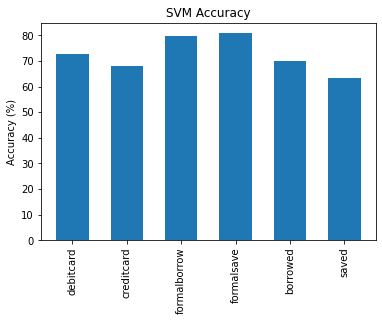

In [22]:
#Plotting prediction performance of the SVM model on different Financial Inclusion measures

dependent_variables_SVM = ['debitcard', 'creditcard', 'formalborrow', 'formalsave', 'borrowed', 'saved']
accuracies_SVM = [72.56857855361596, 68.07980049875312, 79.55112219451371, 80.79800498753117, 69.82543640897757, 63.34164588528678]

plt.bar(dependent_variables_SVM, accuracies_SVM, width=0.6)

plt.title('SVM Accuracy')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)


plt.show()

Highest accuracy scores for **formal borrowing** and **formal saving**.

## Intermezzo

### Predicting whether [Yiğit Tahmisoğlu](https://ceulearning.ceu.edu/user/profile.php?id=19670) is financially included

#### Parametrizing

**Income quintile:** Lower-middle income - he is a graduate student so it is a plausible guess. **(2)** <br>
**Education:** Completed tertiary or more - again he is a graduate student **(3)** <br>
**Sex:** Not a female. **(0)** <br>
**Wage received:** He did a summer internship this year so yes he received a wage in the last 12 months. **(1)**<br>
**Remittance received:** Also yes. **(1)**<br>
**Employed:** Yes. **(1)**<br>
**After:** 2017 is arbitrarily chosen since it is closer to today. **(1)** <br>
**Age:** **(25)**


In [23]:
#independent_vars = df[['inc_q','educ','female','wagereceived','remitreceived','employed','after','age']]
parameters = [2,3,0,1,1,1,1,25] #Creating an array of his parameters
ygt = np.array(parameters)

for var in dependent_vars:
    print(support_vector(df[var],independent_vars, testsize=0.30).predict(ygt.reshape(1,-1))[0])

For dependent variable debitcard the accuracy is: 71.04825291181365 %
1
For dependent variable creditcard the accuracy is: 67.0549084858569 %
1
For dependent variable formalborrow the accuracy is: 82.36272878535775 %
0
For dependent variable formalsave the accuracy is: 81.19800332778702 %
1
For dependent variable borrowed the accuracy is: 67.88685524126456 %
1
For dependent variable saved the accuracy is: 64.39267886855241 %
1


The model predicts that he has both a debit card and a credit card - but he only has a debit card. Also, he saved but did not borrow money through a financial institution in the last 12 months. Furthermore, he engaged in borrowing and saving by other means in the last 12 months. Which are also the case!

Coincidentally the trained SVM model predicts Yiğit's financial inclusion rather accurately.

### Prediction with Decision Trees

In [24]:
def decision_tree(Y, X, testsize=0.50):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testsize, random_state=42)
    
    from sklearn import preprocessing
    from sklearn import utils
    lab = preprocessing.LabelEncoder()
    y_train = lab.fit_transform(y_train)
    y_test = lab.fit_transform(y_test)
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    dtree = DecisionTreeClassifier(random_state=0)
    
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    
    y_pred1 = dtree.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test,y_pred1)*100
    
    print(f'For dependent variable {Y.name} the accuracy is:',accuracy,'%')
    
    return dtree

##### Accuracies

In [25]:
for var in dependent_vars:
    decision_tree(df[var],independent_vars,testsize=0.2)

For dependent variable debitcard the accuracy is: 67.08229426433915 %
For dependent variable creditcard the accuracy is: 62.593516209476306 %
For dependent variable formalborrow the accuracy is: 72.06982543640898 %
For dependent variable formalsave the accuracy is: 73.31670822942642 %
For dependent variable borrowed the accuracy is: 59.10224438902743 %
For dependent variable saved the accuracy is: 56.85785536159601 %


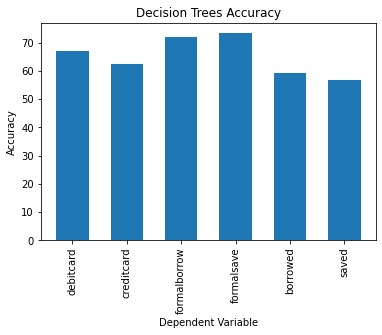

In [26]:
#Plotting prediction performance of the Decision Trees model on different Financial Inclusion measures
dependents_DT = ["debitcard", "creditcard", "formalborrow", "formalsave", "borrowed", "saved"]

accuracies_DT = [67.08229426433915, 62.593516209476306, 72.06982543640898, 73.31670822942642, 59.10224438902743, 56.85785536159601]

plt.bar(dependents_DT, accuracies_DT, width=0.6)
plt.xticks(rotation=90)

plt.title("Decision Trees Accuracy")
plt.xlabel("Dependent Variable")
plt.ylabel("Accuracy")

plt.show()

Again highest accuracy scores for **formal borrowing** and **formal saving** although prediction performance of Decision Trees is overall lower than Support Vector Machines.

### Prediction with Logistic Regression

In [27]:
def logit(Y, X, testsize=0.50):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testsize, random_state=42)
    
    from sklearn import preprocessing
    from sklearn import utils
    lab = preprocessing.LabelEncoder()
    y_train = lab.fit_transform(y_train)
    y_test = lab.fit_transform(y_test)

    steps = [
        ("scaler", StandardScaler()),  
        ("logistic_regression", LogisticRegression())  
    ]

    pipeline = Pipeline(steps)
    
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    acc = pipeline.score(X_test, y_test)*100

    
    
    print(f'For dependent variable {Y.name} the accuracy is:',acc,'%')
    
    return pipeline

##### Accuracies

In [28]:
for var in dependent_vars:
    logit(df[var],independent_vars,testsize=0.2)

For dependent variable debitcard the accuracy is: 72.56857855361596 %
For dependent variable creditcard the accuracy is: 69.32668329177058 %
For dependent variable formalborrow the accuracy is: 80.79800498753117 %
For dependent variable formalsave the accuracy is: 81.54613466334165 %
For dependent variable borrowed the accuracy is: 69.82543640897757 %
For dependent variable saved the accuracy is: 61.09725685785536 %


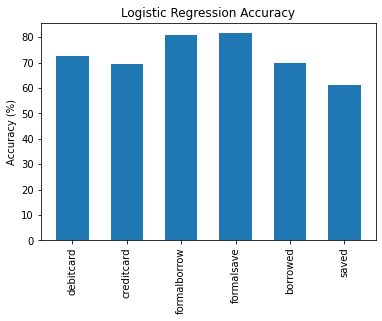

In [29]:
dependent_variables_logit = ['debitcard', 'creditcard', 'formalborrow', 'formalsave', 'borrowed', 'saved']
accuracies_logit = [72.56857855361596, 69.32668329177058, 80.79800498753117, 81.54613466334165, 69.82543640897757, 61.09725685785536]

plt.bar(dependent_variables_logit, accuracies_logit, width=0.6)

plt.title('Logistic Regression Accuracy')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)


plt.show()

Again highest accuracy scores for **formal borrowing** and **formal saving**. There is only a slight improvement of Logit over Support Vector Machines, except for in **saving**, where its performance is only slightly lower than SVMs.

To examine and compare accuracies more carefully, I create the below graphs:

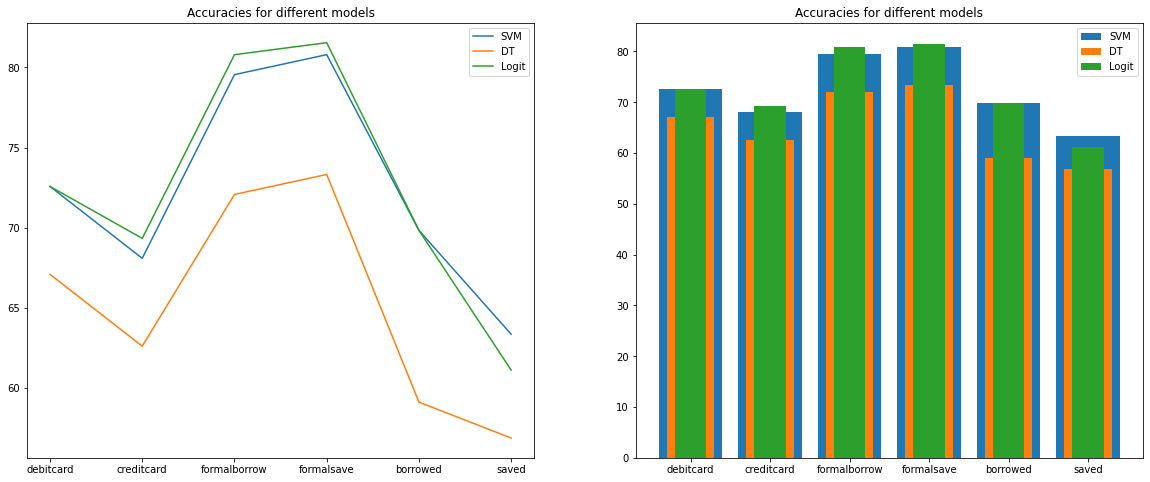

In [30]:
x_values = dependent_variables_SVM

fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(x_values, accuracies_SVM, label='SVM')
ax[0].plot(x_values, accuracies_DT, label='DT')
ax[0].plot(x_values, accuracies_logit, label='Logit')
ax[0].legend()
ax[0].set_title('Accuracies for different models')

ax[1].bar(x_values, accuracies_SVM, label='SVM', width=0.8)
ax[1].bar(x_values, accuracies_DT, label='DT', width=0.6)
ax[1].bar(x_values, accuracies_logit, label='Logit', width=0.4)
ax[1].legend()
ax[1].set_title('Accuracies for different models')


ax[1].set_xticks(x_values)
ax[1].set_xticklabels(dependent_variables_SVM)

plt.show()

As we can clearly see, the Logit model performs more accurate predictions than the other two models. Only for one dependent variable/label, Support Vector Machines peformed more accurately than the Logit model.

## Conclusion and Discussion

Financial inclusion, or the extent to which individuals and businesses have access to formal financial services, is important for the growth and development of a country. However, this access is not always equal among all groups, and some segments of society may have limited access to financial institutions, particularly in middle-income countries like Turkey. Despite having a well-regulated financial system that provides free access to bank accounts and debit cards for all citizens, it is worth investigating whether certain social or economic groups in Turkey have lower access to financial services. 

- Although a much older and less complicated method, Logit seems to be the best performing model among the three. And without exception **formal borrowing** and **formal saving** activities are best predicted by all of the models. In other dependent variables, such as **saving** and **borrowing**, the prediction accuracy of Decision Trees goes as low as fifty percents which is only slightly better than a coin flip. With limited sample size, low number of features and without any additional tuning and future engineering, Logit performed the best. With bigger datasets, more advanced feature selection techniques one of the other two models could outperform Logit.
- By understanding disparities in access to formal financial products, policy makers and financial institutions can work to increase financial inclusion for all members of society. Predictive models can be useful in identifying which individuals are less likely to have access to financial services, allowing for the creation of targeted policies that aim to increase financial inclusion for these groups.
- Given this dataset, the Logit model had the best performance in terms of prediction accuracy. Further, **formal saving** and **formal saving** variables, which are key indicators for financial inclusion, were the best predicted not only by Logit but all the models in this project. But this does not warrant that it will be the case also for out-of-sample predictions. For future projects, a more comprehensive -longer and wider- dataset that would allow for better evaluation of out-of-sample performance and feature engineering could be created. Furthermore, instead of looking at different measures of financial inclusion/dependent variables seperately, a financial inclusion index to summarize them could be created.

# References
- Atan, Mehmet Ataberk. “A Repeated Cross-sectional Analysis of Financial Inclusion in Turkey” June 1, 2022.
- Atan, Mehmet Ataberk. “Rotating Savings and Credit Associations from A Money, Banking Perspective and Specifics of ‘Altın Günü’ Case from Turkey” October 8, 2019.
- Klapper, Leora, and Sandeep Singh. “The Gender Gap in the Use of Financial Services in Turkey.” World Bank, 2015. http://hdl.handle.net/10986/25412.
- Özşuca, Ekin Ayşe. “Financial Inclusion in Turkey: Evidence from Individual Level Data.” Ankara Üniversitesi SBF Dergisi, September 2, 2019, 1–24. https://doi.org/10.33630/ausbf.614032.